In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import scipy
from IPython.display import Audio
from scipy.signal import find_peaks
from scipy.signal import butter, lfilter, sosfreqz

In [9]:
from scipy.signal import butter, sosfilt, sosfreqz

def butter_bandpass(lowcut, highcut, fs, order=5):
        sos = butter(order, [lowcut, highcut], analog=False, btype='band', output='sos')
        return sos

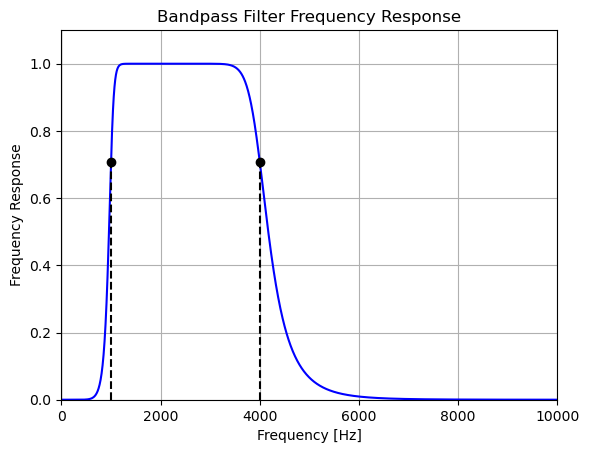

In [11]:
fs = 100000.0  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector from 0 to 1 second
nyq = 0.5 * fs 

lowcut = 1000.0 / nyq
highcut = 4000.0 / nyq

# Plot frequency response of the filter
sos = butter_bandpass(lowcut, highcut, fs, order=8)
w, h = sosfreqz(sos, worN=10000)

plt.figure()
plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
plt.plot(lowcut * nyq, 0.5*np.sqrt(2), 'ko')
plt.plot(highcut * nyq, 0.5*np.sqrt(2), 'ko')
plt.axvline(lowcut, color='k')
plt.axvline(highcut, color='k')
plt.xlim(0, 10000)
plt.ylim(0, 1.1)

plt.vlines(lowcut * nyq, 0, 0.5*np.sqrt(2), color='k', linestyle='--')
plt.vlines(highcut * nyq, 0, 0.5*np.sqrt(2), color='k', linestyle='--')

plt.title("Bandpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Frequency Response')


plt.grid()